In [ ]:
# iris.csv파일을 읽고 SepalLength,SepalWidth,PetalLength, Name열로 
# PetalWidth 를 예측하는  ANN 모델을 생성하세요.  

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

#한글 폰트 등록
# font_location = "c:/Windows/fonts/malgun.ttf"  #(windows)
# font_name = font_manager.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# 원핫 인코딩 - 이름
from sklearn.preprocessing import OneHotEncoder
    
enc = OneHotEncoder(categories='auto')
sourcedata = [
    ['Iris-setosa'],
    ['Iris-virginica'],
    ['Iris-versicolor']
]
enc.fit(sourcedata)
    
# 해당 열을 추출하여 2D 배열로 변환
data_categorical = df["Name"].values.reshape(-1, 1)

In [22]:
# 원핫 인코딩 - 이름
from sklearn.preprocessing import OneHotEncoder
    
enc = OneHotEncoder(categories='auto')
sourcedata = [
    ['Iris-setosa'],
    ['Iris-virginica'],
    ['Iris-versicolor']
]
enc.fit(sourcedata)
    
# 해당 열을 추출하여 2D 배열로 변환
data_categorical = df["Name"].values.reshape(-1, 1)
    
# 원핫인코딩으로 번역
encoded_data = enc.transform(data_categorical).toarray() 
   
# 기존 데이터파일의 성별 칼럼 삭제
second_df = df.drop('Name', axis=1)
    
# 변환된 데이터를 DataFrame으로 만들기
encoded_df = pd.DataFrame(encoded_data)    
encoded_df.columns= ['setosa','virginica','versicolor']
    
    
# 칼럼 병합
result_data = pd.concat([second_df, encoded_df],axis=1)
    
# 결과를 새로운 파일로 저장
result_data.to_csv('encoded_iris_data.csv', index=False)

In [23]:
df = pd.read_csv('encoded_iris_data.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,setosa,virginica,versicolor
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [24]:
# 입력(X)과 출력(y)으로 데이터 분할
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'setosa','virginica','versicolor']]
y = df['PetalWidth']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 모델링

from tensorflow.keras import layers, models
from sklearn import preprocessing 
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential() 
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh, activation = 'relu', input_shape = (Nin,))) 
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout, activation = 'relu')) 
    """출력 노드 수 Nout 개,  활성함수는  relu) """

    model.compile(loss = 'mean_squared_error', optimizer = 'adam') 
    """ cost함수 - mean_squared_error
    – 평균 제곱 오차  최적화  알고리즘 -adam
    """

    return model

In [30]:
# ANN 모델 정의
Nin = 6
Nh = 64
Nout = 1
model = ANN_seq_func(Nin, Nh, Nout)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50

6/6 [==============================] - 1s 32ms/step - loss: 105.0413 - val_loss: 139.2668
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 101.8906 - val_loss: 134.9350
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 99.1318 - val_loss: 130.4566
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 96.0155 - val_loss: 126.0059
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 93.0695 - val_loss: 121.4932
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 89.7470 - val_loss: 117.1035
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 86.8519 - val_loss: 112.3491
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 83.6450 - val_loss: 107.5398
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 80.2919 - val_loss: 102.7469
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 77.0595 - val_loss: 97.7948
Epoc

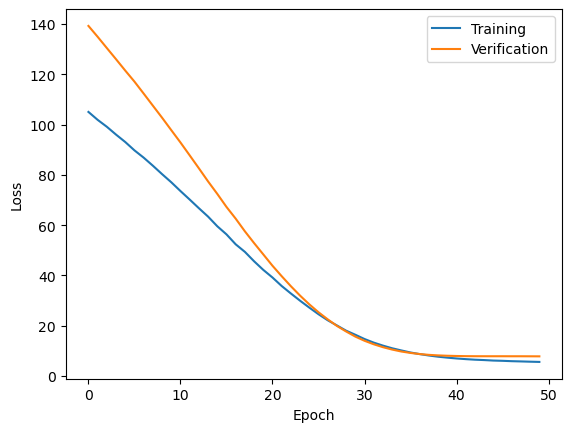

In [31]:
# Plotting  결과 그래프 구현 
import matplotlib.pyplot as plt
%matplotlib inline 

history = history.history

"""Cost/Loss  변화 추이 그래프"""
plt.plot(history['loss'] )
plt.plot(history['val_loss'] )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Verification'], loc=0) #훈련, 확인
plt.show()